# Titanic: Machine Learning from Disaster
In this project I will use various machine learning models such as
logistic regressions, k-neighbours and random forests to predict which
passengers survived the Titanic disaster.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

## Data Cleaning
The dataset includes the following variables:
- __Survived__ - passenger survived (0 = No, 1 = Yes)
- __Pclass__ - ticket class (1 = 1st, 2 = 2nd and 3 = 3rd)
- __Sex__ - Sex
- __Age__ - age in years
- __Sibsp__ - number of siblings / spouses on board
- __Parch__ - number of parents / children on board
- __Ticket__ - ticket number
- __Fare__ - passenger fare
- __Cabin__ - cabin number
- __Embarked__ - port of embarkation

In [3]:
# Determine variables that have missing data
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


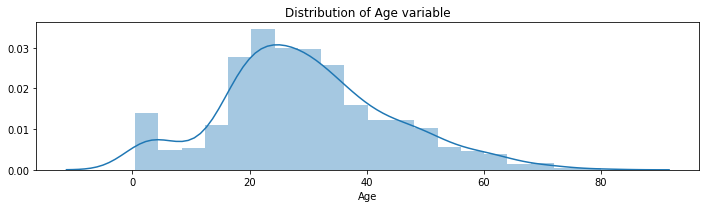

In [4]:
# Analyse age variable
plt.figure(figsize=(10,3))
sns.distplot(train['Age'],kde=True)
plt.title('Distribution of Age variable')
plt.tight_layout()

print(train['Age'].describe().transpose())

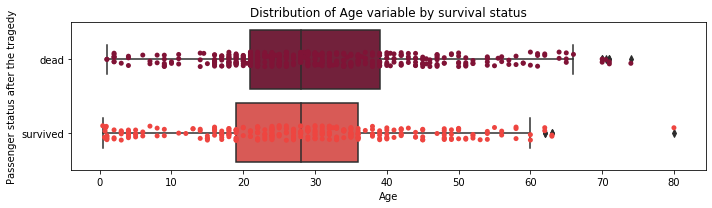

In [5]:
plt.figure(figsize=(10,3))
sns.boxplot(x='Age',y='Survived',data=train,orient='h',palette=['#801336','#EE4540'])
sns.stripplot(x='Age',y='Survived',data=train,orient='h',palette=['#801336','#EE4540'])

plt.yticks( np.arange(2), ['dead', 'survived'])
plt.title('Distribution of Age variable by survival status')
plt.ylabel('Passenger status after the tragedy')
plt.tight_layout()
